## 1. Problem Statement

We have the dataset of 1000 popular movies on IMDB in the last 10 years ie, 2006-2016.

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data.

## 2. Data Loading and Description

This dataset includes 1000 observations of 12 columns. The data fields included are:

| Column Name         | Description                                                                              |
| -------------       |:-------------                                                                           :| 
| Rank                | Movie rank order                                                                         | 
| Title               | The title of the film                                                                    |  
| Genre               | A comma-separated list of genres used to classify the film                               | 
| Description         | Brief one-sentence movie summary                                                         |   
| Director            | The name of the film's director                                                          |
| Actors              | A comma-separated list of the main stars of the film                                     |
| Year                | The year that the film released as an integer.                                           |
| Runtime (Minutes)   | The duration of the film in minutes                                                      |
| Rating              | User rating for the movie 0-10                                                           |
| Votes               | Number of votes                                                                          |
| Revenue (Millions)  | Movie revenue in millions                                                                |
| Metascore           | An aggregated average of critic scores (0-100), higher scores represent positive reviews |

#### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

from subprocess import check_output

#### Importing the dataset

In [5]:
movie_data = pd.read_csv("1000 movies data.csv")

In [6]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 3. Data Profiling

#### Understanding the DataSet

In [7]:
movie_data.shape

(1000, 12)

In [8]:
movie_data.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [9]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [10]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


From above, we can see that __Metascore__ and __Revenue (Millions)__ column contain maximum null values. We will need to find proper value to replace nulls. As both these columns solely depends on movies performance and viewer's choice. 

### Pre-Profiling

In [11]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(movie_data)
profile.to_file(outputfile="movie_data_preprocessing.html")

### Pre-Processing

Handling missing data:
1. For missing Metascore values, since it is related to Rating we can replace missing Metascore values with Rating*10 values
2. For Revenue (Millions) missing values, we need to explore a little more as to which values to replace null with

In [12]:
movie_data.Metascore.fillna(movie_data.Rating*10,inplace=True)

In [13]:
movie_data.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [14]:
movie_data.Genre.unique().shape

(207,)

There are 207 unique Genres but this number is due to combinations of genres. Let us split this and get unique genre as the first mentioned Genre is the major genre the film belongs to.

#### Adding new columns to simplify data

In [15]:
movie_data[['Genre1','Genre2','Genre3']] = movie_data.Genre.str.split(",",expand=True,)

Lets fill the null values in Genre2 and Genre3 with Genre1 value

In [16]:
movie_data["Genre2"].fillna(movie_data.Genre1,inplace=True)

In [17]:
movie_data["Genre3"].fillna(movie_data.Genre2,inplace=True)

In [18]:
print(movie_data.Genre1.unique().shape)
print(movie_data.Genre2.unique().shape)
print(movie_data.Genre3.unique().shape)

(13,)
(19,)
(19,)


#### There are two columns representing rating, Metascore is on a scale of 0-100 and Rating is on a scale of 0-10, lets create a new column with average of both on a scale of 10.

In [19]:
movie_data["Avg_Rating"] = (movie_data["Rating"]+movie_data["Metascore"]/10)/2

In [20]:
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,7.85
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,6.75
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,Thriller,6.75
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,6.55
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,5.10
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy,5.15
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music,8.80
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Comedy,Comedy,Comedy,6.75
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography,7.45
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Adventure,Drama,Romance,5.55


In [21]:
print(movie_data.Votes.min())
print(movie_data.Votes.max())

movie_data[movie_data.Votes>1000000].Votes.count()

61
1791916


6

#### Creating new columns __Vote_Groups__ and __Revenue_Group__ to analyse the trend and relation between data better

In [26]:
movie_data["Vote_Groups"] = pd.cut(movie_data["Votes"],
                                 [0,250000,500000,750000,1000000,1250000,1500000,1800000],
                                 labels=['0-25','25-50','50-75','75-100','100-125','125-150','150+'],include_lowest=True)

In [28]:
print(movie_data["Revenue (Millions)"].max())
print(movie_data["Revenue (Millions)"].min())
movie_data["Revenue_Group"] = pd.cut(movie_data["Revenue (Millions)"].dropna(),
                                     [0,200,400,600,800,1000],
                                     labels=['0-200','200-400','400-600','600-800','800+'],include_lowest=True)

936.63
0.0


In [63]:
movie_data["Rate_Group"] = pd.cut(movie_data["Rating"],
                                 [0,2,4,6,8,10],
                                 labels=['0-2','2-4','4-6','6-8','8-10'],include_lowest=True)

In [22]:
movie_data = movie_data.drop(["Description"],axis=1)

In [23]:
movie_data.groupby("Director").filter(lambda x: len(x) >= 2).isnull().sum()

Rank                   0
Title                  0
Genre                  0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)    26
Metascore              0
Genre1                 0
Genre2                 0
Genre3                 0
Avg_Rating             0
dtype: int64

### Post-Profiling

In [24]:
post_profile = pandas_profiling.ProfileReport(movie_data)
post_profile.to_file("movie_data_post_profile.html")

## 4. EDA Process

#### 4.1 Is the rating of a movie based on Voting ?

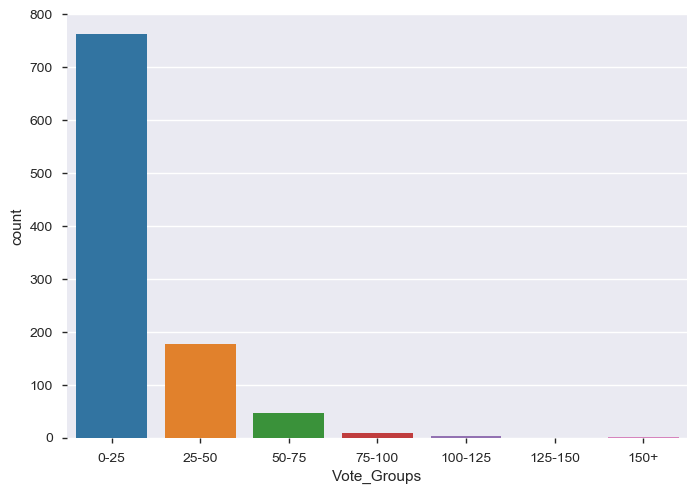

In [35]:
sns.countplot(x=movie_data["Vote_Groups"],data=movie_data)

In [61]:
movie_data.groupby("Genre1").mean().sort_values("Rating",ascending=False)
#movie_data.groupby("Genre2").mean().sort_values("Revenue (Millions)",ascending=False)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Avg_Rating
Genre1,,,,,,,,
Animation,487.040816,2012.734694,98.142857,7.324490,208159.428571,191.223404,70.836735,7.204082
Biography,512.984375,2013.437500,122.578125,7.318750,153060.718750,55.954500,68.937500,7.106250
Drama,512.635897,2012.861538,114.953846,6.954872,129445.128205,35.874487,64.779487,6.716410
Adventure,474.266667,2012.320000,119.013333,6.908000,225669.320000,113.453521,61.893333,6.548667
Mystery,571.307692,2012.384615,112.923077,6.876923,218672.000000,64.379091,56.384615,6.257692
Crime,530.577465,2012.605634,115.816901,6.807042,150124.957746,41.043519,60.887324,6.447887
Romance,410.000000,2013.500000,112.000000,6.600000,104572.000000,62.450000,68.000000,6.700000
Action,434.976109,2012.580205,117.354949,6.592491,235948.580205,122.093551,54.017065,5.997099
Comedy,567.760000,2012.880000,106.771429,6.493143,115640.188571,51.582244,56.154286,6.054286


##### If we take out the mean Rating on basis on Genre, then we can see which Genre has highest average Rating and average highest Revenue. 

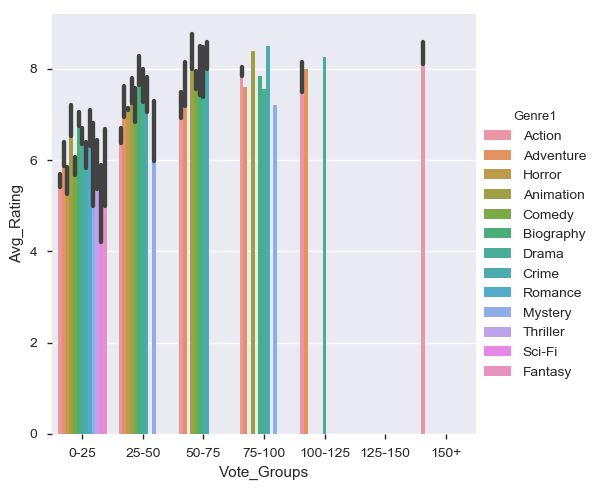

In [47]:
sns.catplot(x="Vote_Groups",y="Avg_Rating",hue="Genre1",data=movie_data,kind='bar')

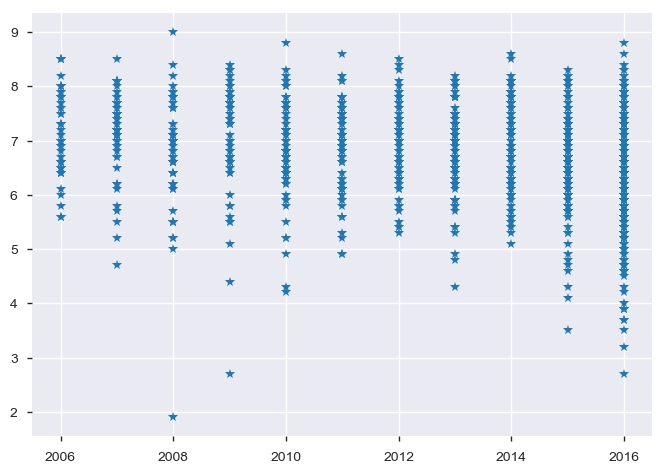

In [48]:
plt.plot(movie_data["Year"],movie_data["Rating"],'*')

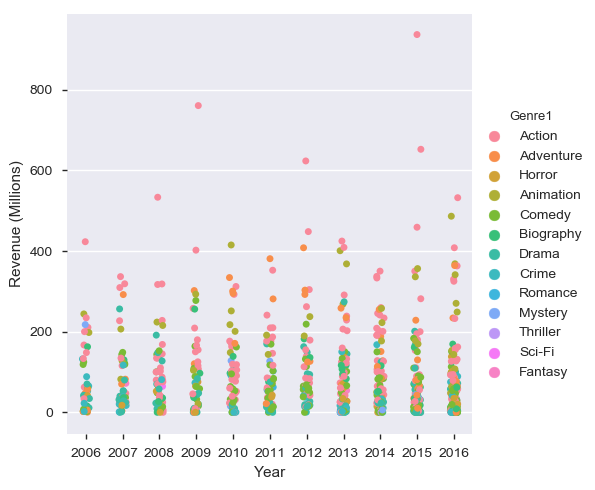

In [52]:
sns.catplot(x="Year",y="Revenue (Millions)",hue="Genre1",data=movie_data)

Considering, "Genre1" as the main genre of the movie from the multiple genre mentioned under "Genre" column, from above plots we see that "Action" genre is the highest revenue generator and most voted genre. 

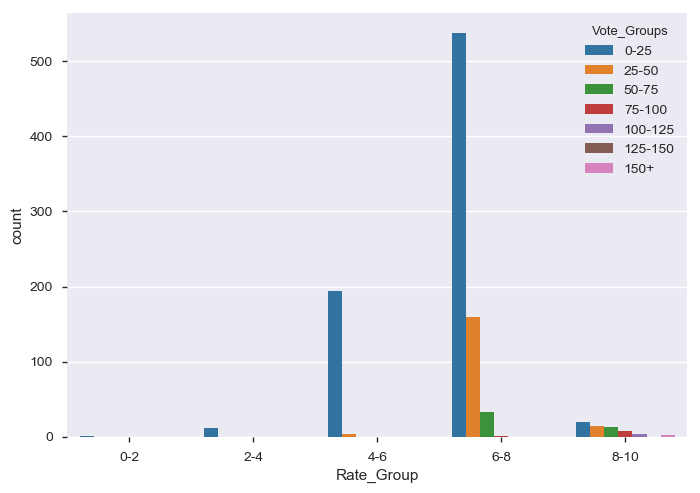

In [71]:
sns.countplot(movie_data["Rate_Group"],hue=movie_data["Vote_Groups"])

Text(0.5, 1.0, 'Vote distribution using FacetGrid')

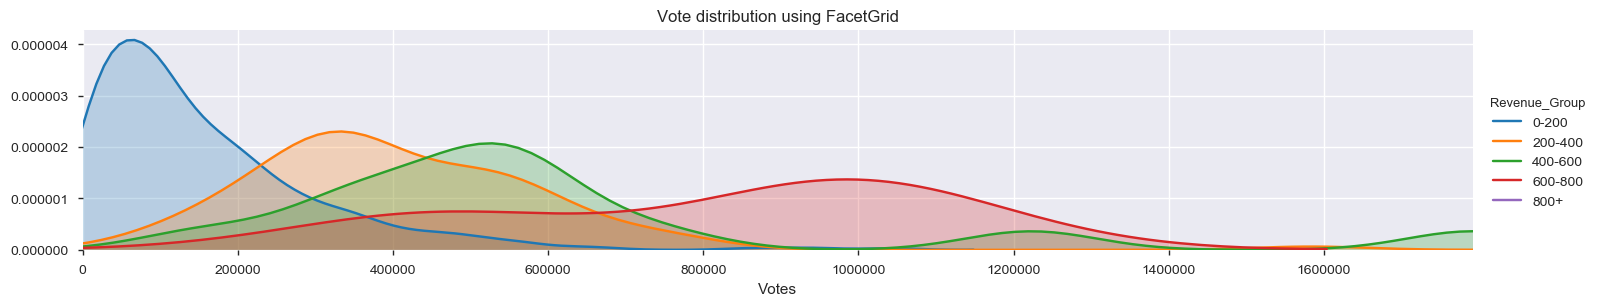

In [77]:
as_fig = sns.FacetGrid(movie_data,hue='Revenue_Group',aspect=5)

as_fig.map(sns.kdeplot,"Votes",shade=True)

oldest = movie_data["Votes"].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Vote distribution using FacetGrid')

In [86]:
movie_data.groupby("Director").max()

,Rank,Title,Genre,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Avg_Rating,Vote_Groups,Revenue_Group,Rate_Group
Director,,,,,,,,,,,,,,,,,
Aamir Khan,992,Taare Zameen Par,"Drama,Family,Music","Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0,Drama,Family,Music,6.35,0-25,0-200,8-10
Abdellatif Kechiche,312,La vie d'Adèle,"Drama,Romance","Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0,Drama,Romance,Romance,8.30,0-25,0-200,6-8
Adam Leon,784,Tramps,"Comedy,Romance","Callum Turner, Grace Van Patten, Michal Vondel...",2016,82,6.5,1031,NaN,77.0,Comedy,Romance,Romance,7.10,0-25,NaN,6-8
Adam McKay,936,The Other Guys,Comedy,"Will Ferrell, Mark Wahlberg, Derek Jeter, Eva ...",2015,130,7.8,246360,148.21,81.0,Comedy,Comedy,Sport,7.95,0-25,0-200,6-8
Adam Shankman,973,Rock of Ages,"Comedy,Drama,Musical","Julianne Hough, Diego Boneta, Tom Cruise, Alec...",2012,123,6.7,102954,118.82,81.0,Comedy,Drama,Musical,7.40,0-25,0-200,6-8
Adam Wingard,730,The Guest,Thriller,"James Allen McCune, Callie Hernandez, Corbin R...",2016,100,6.7,71069,20.75,76.0,Thriller,Thriller,Thriller,7.15,0-25,0-200,6-8
Afonso Poyart,652,Solace,"Crime,Drama,Mystery","Anthony Hopkins, Jeffrey Dean Morgan, Abbie Co...",2015,101,6.4,36300,NaN,36.0,Crime,Drama,Mystery,5.00,0-25,NaN,6-8
Aisling Walsh,840,Maudie,"Biography,Drama,Romance","Ethan Hawke, Sally Hawkins, Kari Matchett, Zac...",2016,115,7.8,346,NaN,60.0,Biography,Drama,Romance,6.90,0-25,NaN,6-8
Akan Satayev,197,Hacker,"Crime,Drama,Thriller","Callan McAuliffe, Lorraine Nicholson, Daniel E...",2016,95,6.3,3799,NaN,63.0,Crime,Drama,Thriller,6.30,0-25,NaN,6-8
